# Importing Necessary Dependencies

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [15]:
df = pd.read_csv('train.csv')

# Analyzing Data

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [18]:
df.shape

(891, 9)

In [19]:
df.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [20]:
df.drop(columns=['Cabin'], inplace=True)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Preprocessing

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_14804\3669759150.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_14804\3669759150.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare'>

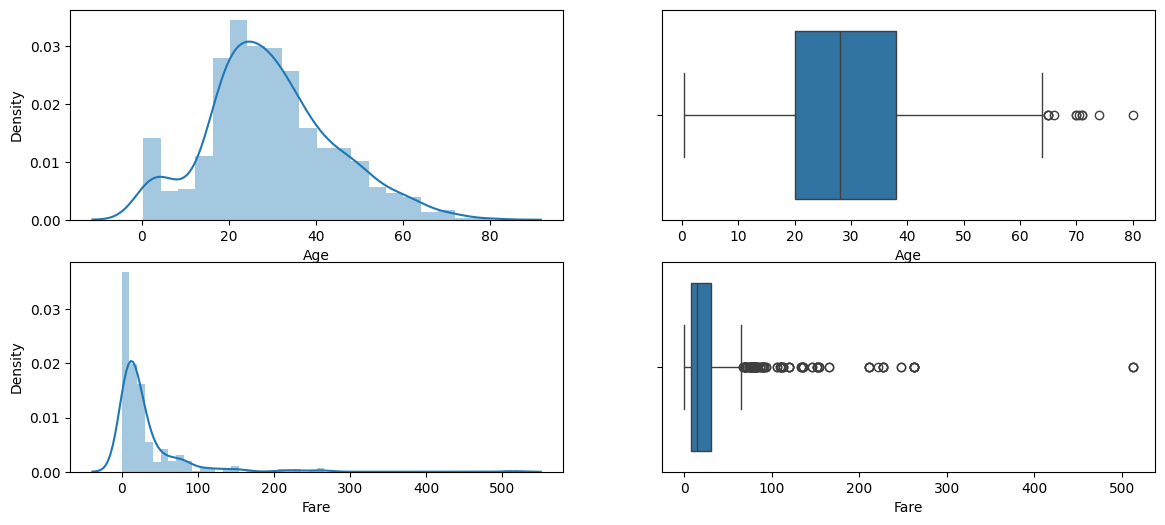

In [27]:
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.distplot(df['Age'])

plt.subplot(2,2,2)
sns.boxplot(df['Age'], orient='h')

plt.subplot(2,2,3)
sns.distplot(df['Fare'])

plt.subplot(2,2,4)
sns.boxplot(df['Fare'], orient='h')

# Outlier Removal

## On Age Column

In [39]:
percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)

In [41]:
IQR = percentile75 - percentile25

In [42]:
# Z-Score for Age
# upper_limit = df['Age'].mean() + 3 * df['Age'].std()
# lower_limit = df['Age'].mean() - 3 * df['Age'].std()

In [44]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [45]:
upper_limit

64.8125

In [46]:
lower_limit

-6.6875

In [47]:
df[df['Age'] > upper_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
33,0,2,male,66.00000,0,0,10.5000,S
54,0,1,male,65.00000,0,1,61.9792,C
96,0,1,male,71.00000,0,0,34.6542,C
116,0,3,male,70.50000,0,0,7.7500,Q
280,0,3,male,65.00000,0,0,7.7500,Q
456,0,1,male,65.00000,0,0,26.5500,S
493,0,1,male,71.00000,0,0,49.5042,C
630,1,1,male,73.27861,0,0,30.0000,S
672,0,2,male,70.00000,0,0,10.5000,S
745,0,1,male,70.00000,1,1,71.0000,S


In [48]:
#Winsorization
df['Age'] = np.where(
    df['Age'] > upper_limit, 
    upper_limit, 
    np.where(
        df['Age'] < lower_limit,
        lower_limit, 
        df['Age']
    )
)

<Axes: xlabel='Age'>

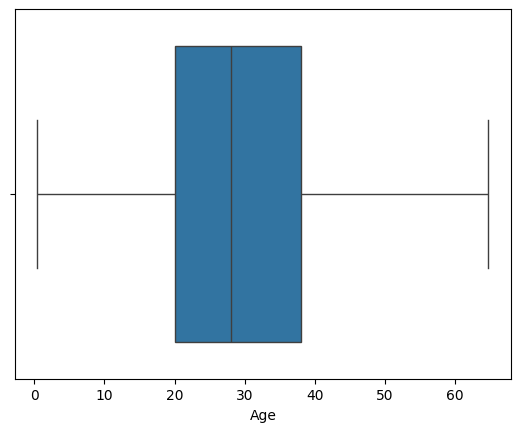

In [50]:
sns.boxplot(df['Age'], orient='h')

## On Fare Column

In [51]:
percentile25 = df['Fare'].quantile(0.25)
percentile75 = df['Fare'].quantile(0.75)

In [52]:
IQR = percentile75 - percentile25

In [53]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [54]:
upper_limit

65.6344

In [55]:
lower_limit

-26.724

In [56]:
df[df['Fare'] > upper_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
27,0,1,male,19.0,3,2,263.0000,S
31,1,1,female,NaN,1,0,146.5208,C
34,0,1,male,28.0,1,0,82.1708,C
52,1,1,female,49.0,1,0,76.7292,C
...,...,...,...,...,...,...,...,...
846,0,3,male,NaN,8,2,69.5500,S
849,1,1,female,NaN,1,0,89.1042,C
856,1,1,female,45.0,1,1,164.8667,S
863,0,3,female,NaN,8,2,69.5500,S


In [57]:
#Winsorization
df['Fare'] = np.where(
    df['Fare'] > upper_limit, 
    upper_limit, 
    np.where(
        df['Fare'] < lower_limit,
        lower_limit, 
        df['Fare']
    )
)

<Axes: xlabel='Fare'>

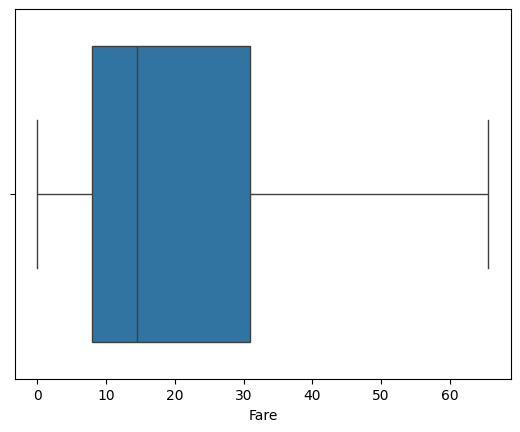

In [59]:
sns.boxplot(df['Fare'], orient='h')

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_14804\1375791787.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_14804\1375791787.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare'>

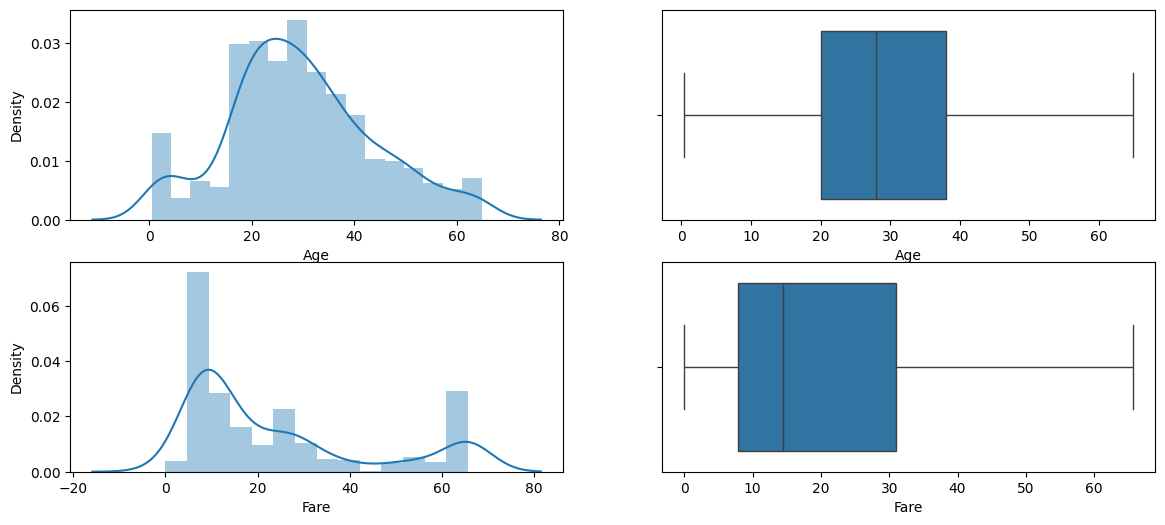

In [60]:
# Comparision
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.distplot(df['Age'])

plt.subplot(2,2,2)
sns.boxplot(df['Age'], orient='h')

plt.subplot(2,2,3)
sns.distplot(df['Fare'])

plt.subplot(2,2,4)
sns.boxplot(df['Fare'], orient='h')

# Feature Construction

In [72]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [73]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,65.6344,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [74]:
def transform_value(data):
    if data == 1:
        return 0 #Alone
    elif data > 1 and data <= 4:
        return 1 #Small Family
    else:
        return 2 #Large Family

In [75]:
df['Family'] = df['Family'].apply(transform_value)

In [76]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,65.6344,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [77]:
df.drop(columns=['SibSp','Parch'], inplace=True)

In [78]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,65.6344,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


# Appying PipeLine

In [108]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Family
331,1,male,45.5,28.5000,S,0
733,2,male,23.0,13.0000,S,0
382,3,male,32.0,7.9250,S,0
704,3,male,26.0,7.8542,S,1
813,3,female,6.0,31.2750,S,2


In [111]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Family        0
dtype: int64

In [94]:
trf1 = ColumnTransformer([
    ('impute1', SimpleImputer(), [2]),
    ('imputer2', SimpleImputer(strategy='median'), [3])
], remainder='passthrough')

In [95]:
trf2 = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), [1,4])
])

In [96]:
trf3 = ColumnTransformer([
    ('normaldistribute', PowerTransformer(), [2,3])
])

In [97]:
trf4 = LogisticRegression()

In [98]:
# Pipeline
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4)
])

In [99]:
# Fitting Our Pipe
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute1', SimpleImputer(),
                                                  [2]),
                                                 ('imputer2',
                                                  SimpleImputer(strategy='median'),
                                                  [3])])),
                ('trf2',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 4])])),
                ('trf3',
                 ColumnTransformer(transformers=[('normaldistribute',
                                                  PowerTransformer(),
                                                  [2, 3])])),
                ('trf4', LogisticRegression())])

In [100]:
pipe.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

# Without PipeLine

In [120]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

In [121]:
si = SimpleImputer()

X_train = si.fit_transform(X_train)
X_test = si.transform(X_test)

In [125]:
pt = PowerTransformer()

X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

In [126]:
clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression()

In [127]:
y_pred = clf.predict(X_test)

In [128]:
np.mean(cross_val_score(LogisticRegression(), X_train, y_train, scoring='accuracy', cv=20))

0.7625000000000002

# Without Feature Engineering

In [138]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

In [141]:
clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression()

In [142]:
np.mean(cross_val_score(LogisticRegression(), X_train, y_train, scoring='accuracy', cv=20))

0.8046825396825396